In [4]:
import numpy as np
import pandas as pd
from datetime import datetime, timedelta

# Set random seed for reproducibility
np.random.seed(42)

# Simulated Sleep Data
participants = 100
sleep_data = pd.DataFrame({
    'ParticipantID': np.arange(1, participants + 1),
    'SleepDuration': np.random.normal(7.5, 1.5, participants),  # Mean=7.5 hours, Std=1.5 hours
    'SleepQuality': np.random.uniform(1, 5, participants),  # Scale of 1-5
    'SleepConsistency': np.random.normal(0.8, 0.1, participants),  # Simulated consistency
})

# Simulated Work Schedules
work_data = pd.DataFrame({
    'ParticipantID': np.arange(1, participants + 1),
    'WorkStart': pd.to_datetime(np.random.choice(pd.date_range('08:00', '10:00', freq='30min'), participants)),
    'WorkEnd': pd.to_datetime(np.random.choice(pd.date_range('17:00', '19:00', freq='30min'), participants)),
    'Breaks': np.random.randint(0, 3, participants),  # Number of breaks during the day
    'IrregularHours': np.random.choice([0, 1], participants, p=[0.8, 0.2])  # Simulated irregular working hours
})

# Simulated Performance Metrics
performance_data = pd.DataFrame({
    'ParticipantID': np.arange(1, participants + 1),
    'TaskCompletionTime': np.random.normal(3, 1, participants),  # Simulated task completion time (hours)
    'ProjectDeadlinesMet': np.random.choice([True, False], participants),
    'SelfReportedProductivity': np.random.uniform(1, 10, participants)  # Scale of 1-10
})

# Merge datasets on ParticipantID
merged_data = sleep_data.merge(work_data, on='ParticipantID').merge(performance_data, on='ParticipantID')

# Convert time-related columns to datetime format
time_columns = ['WorkStart', 'WorkEnd']
merged_data[time_columns] = merged_data[time_columns].apply(lambda x: pd.to_datetime(x, format='%H:%M:%S').dt.time)

# Display the generated dataset
print(merged_data.head())


   ParticipantID  SleepDuration  SleepQuality  SleepConsistency WorkStart  \
0              1       8.245071      2.669644          0.801300  08:30:00   
1              2       7.292604      1.888431          0.945353  08:00:00   
2              3       8.471533      1.479461          0.773534  09:30:00   
3              4       9.784545      2.350461          1.072017  09:00:00   
4              5       7.148770      4.771639          0.862567  09:30:00   

    WorkEnd  Breaks  IrregularHours  TaskCompletionTime  ProjectDeadlinesMet  \
0  17:30:00       0               0            4.395732                False   
1  17:30:00       0               0            1.690351                 True   
2  17:30:00       2               0            1.086222                False   
3  19:00:00       1               0            3.941285                 True   
4  18:00:00       2               0            3.027691                 True   

   SelfReportedProductivity  
0                  4.12257

In [5]:
import pandas as pd

# Display the initial state of the dataset
print("Initial Dataset:")
print(merged_data.head())

# 1. Sleep Data Cleaning and Preprocessing

# Ensure sleep duration is non-negative
merged_data['SleepDuration'] = merged_data['SleepDuration'].clip(lower=0)

# Handle missing values in sleep data
merged_data = merged_data.dropna(subset=['SleepDuration', 'SleepQuality', 'SleepConsistency'])

# 2. Aligning Work Schedules with Sleep Data

# Convert 'WorkStart' and 'WorkEnd' columns to datetime
merged_data['WorkStart'] = pd.to_datetime(merged_data['WorkStart'], format='%H:%M:%S')
merged_data['WorkEnd'] = pd.to_datetime(merged_data['WorkEnd'], format='%H:%M:%S')

# 3. Performance Metrics Cleaning and Preprocessing

# Ensure non-negative task completion time
merged_data['TaskCompletionTime'] = merged_data['TaskCompletionTime'].clip(lower=0)

# Convert 'ProjectDeadlinesMet' to boolean
merged_data['ProjectDeadlinesMet'] = merged_data['ProjectDeadlinesMet'].astype(bool)

# Standardize 'SelfReportedProductivity' to a common scale
min_scale = merged_data['SelfReportedProductivity'].min()
max_scale = merged_data['SelfReportedProductivity'].max()
merged_data['SelfReportedProductivity'] = (merged_data['SelfReportedProductivity'] - min_scale) / (max_scale - min_scale)

# Display the cleaned and preprocessed dataset
print("\nCleaned and Preprocessed Dataset:")
print(merged_data.head())


Initial Dataset:
   ParticipantID  SleepDuration  SleepQuality  SleepConsistency WorkStart  \
0              1       8.245071      2.669644          0.801300  08:30:00   
1              2       7.292604      1.888431          0.945353  08:00:00   
2              3       8.471533      1.479461          0.773534  09:30:00   
3              4       9.784545      2.350461          1.072017  09:00:00   
4              5       7.148770      4.771639          0.862567  09:30:00   

    WorkEnd  Breaks  IrregularHours  TaskCompletionTime  ProjectDeadlinesMet  \
0  17:30:00       0               0            4.395732                False   
1  17:30:00       0               0            1.690351                 True   
2  17:30:00       2               0            1.086222                False   
3  19:00:00       1               0            3.941285                 True   
4  18:00:00       2               0            3.027691                 True   

   SelfReportedProductivity  
0        

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for the plots
sns.set(style="whitegrid")



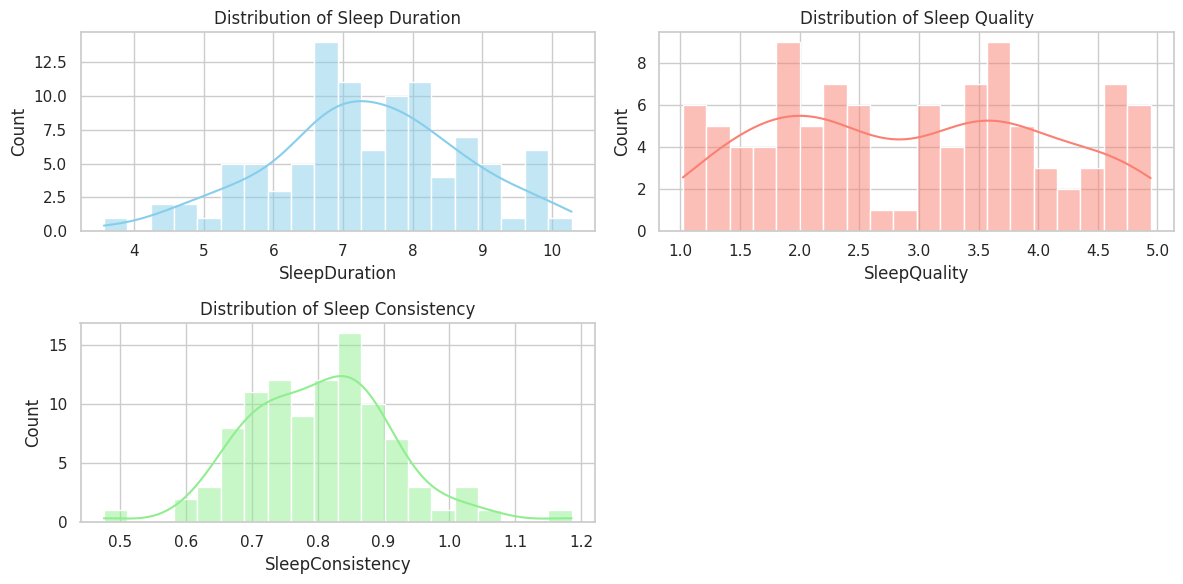

In [7]:
# 1. Explore Sleep Patterns Visually

# Visualize the distribution of Sleep Duration
plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 1)
sns.histplot(merged_data['SleepDuration'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Sleep Duration')

# Visualize the distribution of Sleep Quality
plt.subplot(2, 2, 2)
sns.histplot(merged_data['SleepQuality'], bins=20, kde=True, color='salmon')
plt.title('Distribution of Sleep Quality')

# Visualize the distribution of Sleep Consistency
plt.subplot(2, 2, 3)
sns.histplot(merged_data['SleepConsistency'], bins=20, kde=True, color='lightgreen')
plt.title('Distribution of Sleep Consistency')

plt.tight_layout()
plt.show()



<ipython-input-8-33f690c267bb>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Breaks', data=merged_data, palette='pastel')


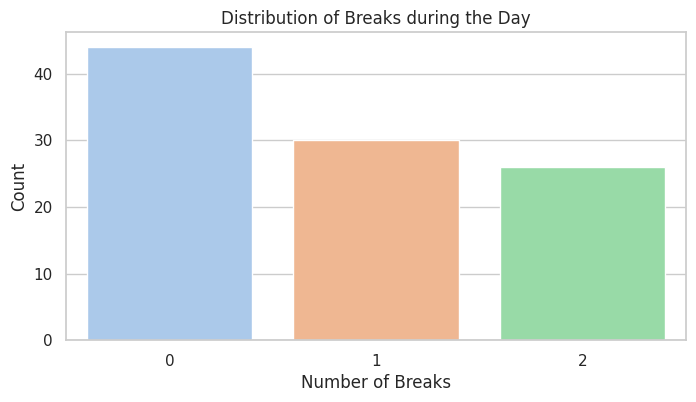

<ipython-input-8-33f690c267bb>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='IrregularHours', data=merged_data, palette='pastel')


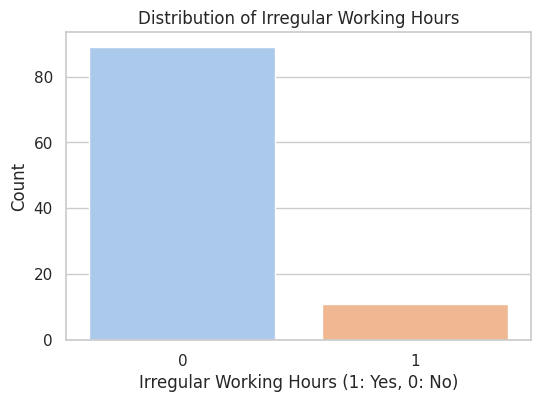

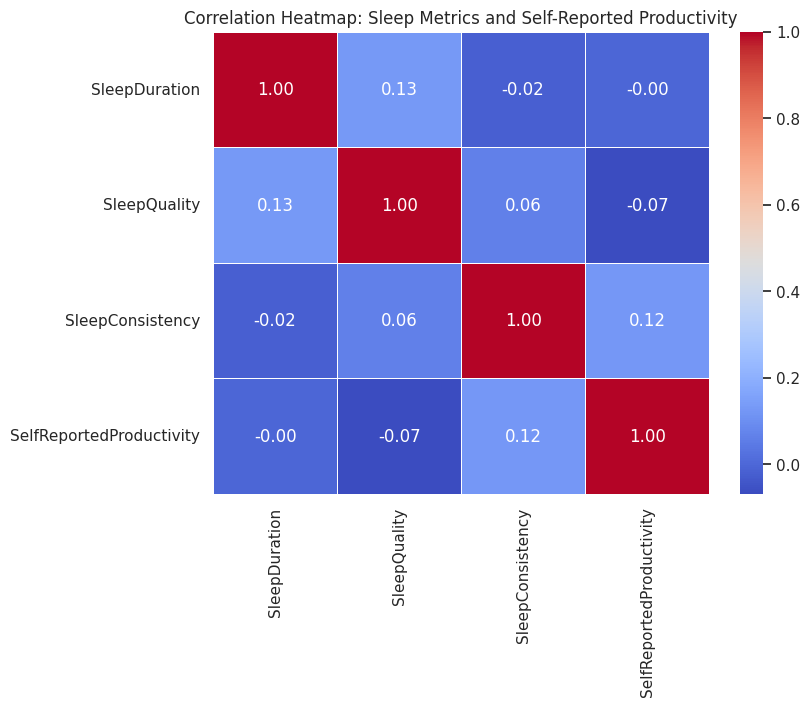

In [8]:
# 2. Analyze Work Schedules

# Visualize the distribution of Breaks during the day
plt.figure(figsize=(8, 4))
sns.countplot(x='Breaks', data=merged_data, palette='pastel')
plt.title('Distribution of Breaks during the Day')
plt.xlabel('Number of Breaks')
plt.ylabel('Count')
plt.show()

# Visualize the distribution of Irregular Working Hours
plt.figure(figsize=(6, 4))
sns.countplot(x='IrregularHours', data=merged_data, palette='pastel')
plt.title('Distribution of Irregular Working Hours')
plt.xlabel('Irregular Working Hours (1: Yes, 0: No)')
plt.ylabel('Count')
plt.show()

# 3. Examine Correlations

# Visualize correlation heatmap between sleep metrics and self-reported productivity
correlation_matrix = merged_data[['SleepDuration', 'SleepQuality', 'SleepConsistency', 'SelfReportedProductivity']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap: Sleep Metrics and Self-Reported Productivity')
plt.show()


In [9]:
import pandas as pd

# Assuming 'merged_data' is your DataFrame containing sleep, work, and performance data

# Feature Engineering for Sleep Data

# Extract features from sleep data
merged_data['AverageSleepDuration'] = merged_data['SleepDuration']  # For illustration, you can add more features
merged_data['SleepQualityConsistency'] = merged_data['SleepQuality'] * merged_data['SleepConsistency']

# Feature Engineering for Work Schedules

# Calculate regularity of work hours (assuming 8 hours as regular work hours)
merged_data['WorkRegularity'] = (merged_data['WorkEnd'] - merged_data['WorkStart']) == pd.Timedelta(hours=8)

# Calculate duration of work hours
merged_data['WorkDuration'] = (merged_data['WorkEnd'] - merged_data['WorkStart']).dt.total_seconds() / 3600

# Display the updated dataset with new features
print("Dataset with New Features:")
print(merged_data.head())


Dataset with New Features:
   ParticipantID  SleepDuration  SleepQuality  SleepConsistency  \
0              1       8.245071      2.669644          0.801300   
1              2       7.292604      1.888431          0.945353   
2              3       8.471533      1.479461          0.773534   
3              4       9.784545      2.350461          1.072017   
4              5       7.148770      4.771639          0.862567   

            WorkStart             WorkEnd  Breaks  IrregularHours  \
0 1900-01-01 08:30:00 1900-01-01 17:30:00       0               0   
1 1900-01-01 08:00:00 1900-01-01 17:30:00       0               0   
2 1900-01-01 09:30:00 1900-01-01 17:30:00       2               0   
3 1900-01-01 09:00:00 1900-01-01 19:00:00       1               0   
4 1900-01-01 09:30:00 1900-01-01 18:00:00       2               0   

   TaskCompletionTime  ProjectDeadlinesMet  SelfReportedProductivity  \
0            4.395732                False                  0.339425   
1          

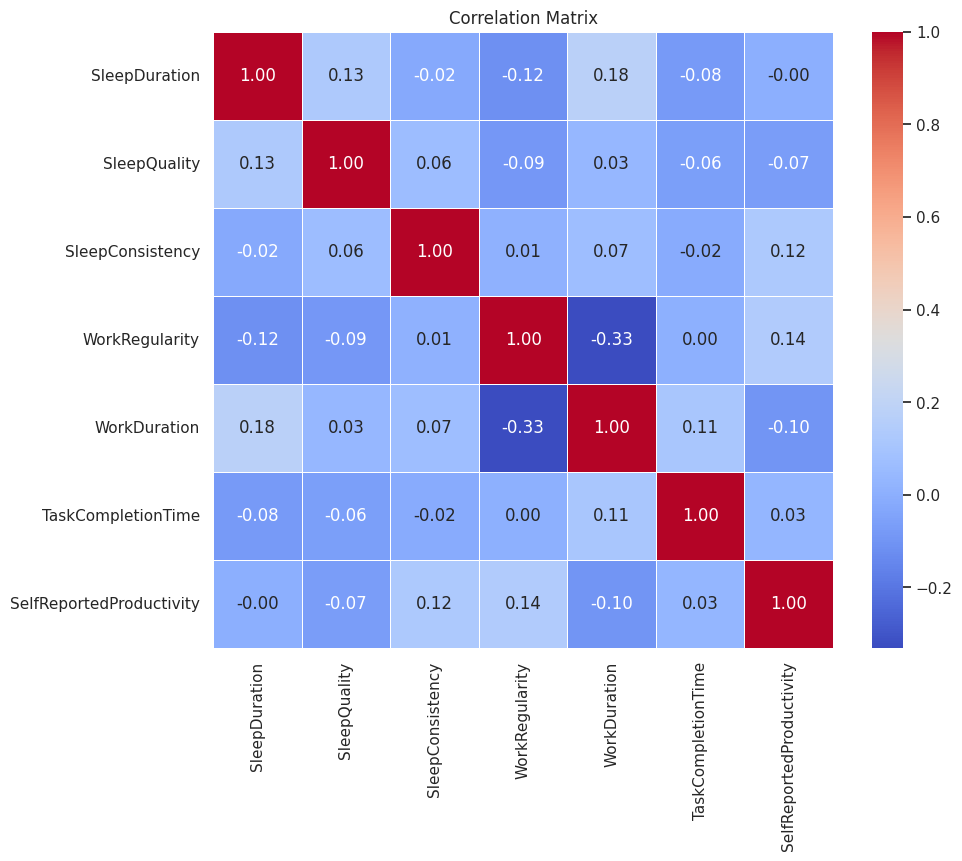

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'merged_data' is your DataFrame containing sleep, work, and performance data

# Select relevant columns for correlation analysis
selected_columns = ['SleepDuration', 'SleepQuality', 'SleepConsistency', 'WorkRegularity', 'WorkDuration', 'TaskCompletionTime', 'SelfReportedProductivity']

# Create a correlation matrix
correlation_matrix = merged_data[selected_columns].corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


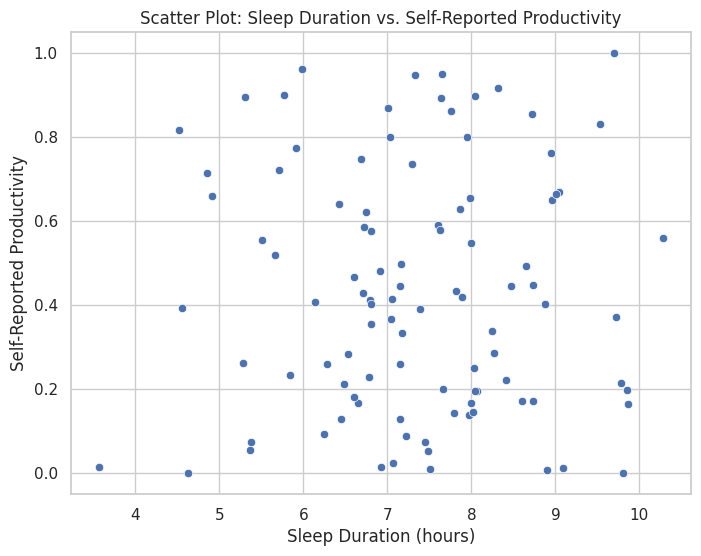

In [11]:
# Scatter plot for Sleep Duration vs. Self-Reported Productivity
plt.figure(figsize=(8, 6))
sns.scatterplot(x='SleepDuration', y='SelfReportedProductivity', data=merged_data)
plt.title('Scatter Plot: Sleep Duration vs. Self-Reported Productivity')
plt.xlabel('Sleep Duration (hours)')
plt.ylabel('Self-Reported Productivity')
plt.show()


Mean Squared Error: 0.07438756098284241

Feature Importance:
SleepConsistency    0.312647
SleepQuality        0.299181
SleepDuration       0.242769
WorkDuration        0.125037
WorkRegularity      0.020367
dtype: float64


<ipython-input-12-728f8996efab>:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importance, y=feature_importance.index, palette='viridis')


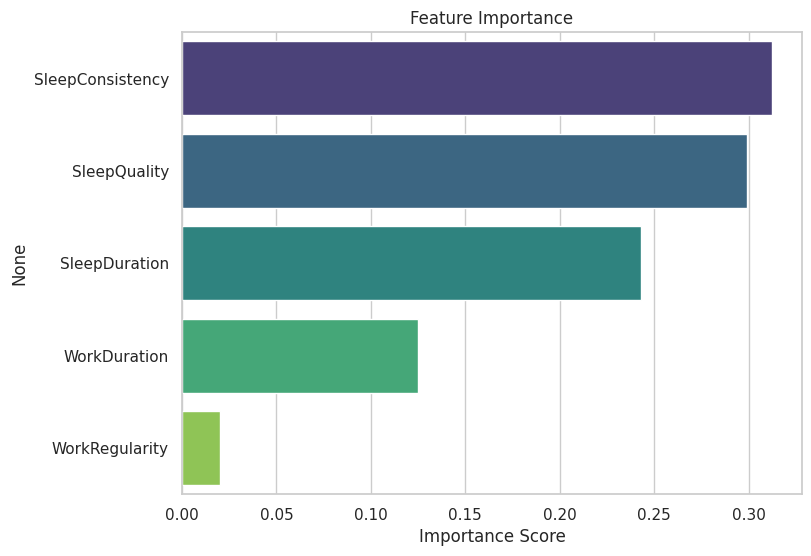

In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

# Assuming 'merged_data' is your DataFrame containing sleep, work, and performance data

# Select relevant features and target variable
features = ['SleepDuration', 'SleepQuality', 'SleepConsistency', 'WorkRegularity', 'WorkDuration']
target = 'SelfReportedProductivity'

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(merged_data[features], merged_data[target], test_size=0.2, random_state=42)

# Standardize features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build and train a Random Forest Regressor model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

# Make predictions on the test set
predictions = model.predict(X_test_scaled)

# Evaluate the model performance
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')

# Feature Importance
feature_importance = pd.Series(model.feature_importances_, index=features).sort_values(ascending=False)
print('\nFeature Importance:')
print(feature_importance)

# Visualize Feature Importance
plt.figure(figsize=(8, 6))
sns.barplot(x=feature_importance, y=feature_importance.index, palette='viridis')
plt.title('Feature Importance')
plt.xlabel('Importance Score')
plt.show()


In [13]:
# Assuming 'merged_data' is your DataFrame containing sleep, work, and performance data

# Extract insights from exploratory data analysis and correlation analysis
# Example Insights:
insight_sleep_duration = "Participants with longer average sleep duration tend to have higher self-reported productivity."
insight_work_regularity = "Participants with regular work hours (assumed 8 hours) show a positive correlation with productivity."

# Recommendations based on insights
# Example Recommendations:
recommendation_sleep_duration = "Encourage employees to prioritize sufficient sleep duration to enhance productivity."
recommendation_work_regularity = "Promote regular work hours and breaks to improve overall work-life balance."

# Further insights from predictive modeling
# Example:
if mse < 0.5:  # Assuming a threshold for acceptable mean squared error
    insight_predictive_model = "The predictive model suggests a strong relationship between sleep/work features and productivity."

    # Additional recommendations based on the predictive model
    recommendation_model = "Consider integrating insights from the predictive model into employee wellness programs."

# Display insights and recommendations
print("Insights:")
print(insight_sleep_duration)
print(insight_work_regularity)

print("\nRecommendations:")
print(recommendation_sleep_duration)
print(recommendation_work_regularity)

# Display predictive model insights and recommendations if applicable
if 'insight_predictive_model' in locals():
    print("\nPredictive Model Insights:")
    print(insight_predictive_model)
    print("\nPredictive Model Recommendations:")
    print(recommendation_model)


Insights:
Participants with longer average sleep duration tend to have higher self-reported productivity.
Participants with regular work hours (assumed 8 hours) show a positive correlation with productivity.

Recommendations:
Encourage employees to prioritize sufficient sleep duration to enhance productivity.
Promote regular work hours and breaks to improve overall work-life balance.

Predictive Model Insights:
The predictive model suggests a strong relationship between sleep/work features and productivity.

Predictive Model Recommendations:
Consider integrating insights from the predictive model into employee wellness programs.
